In [1]:
##### Libraries which should be installed prior
# !pip install numpy
# !pip install pandas
# !pip install openpyxl
# !pip install seaborn
# !pip install matplotlib

In [2]:
#Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#this is to ignore warnings after the cell is executed
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read data dictionary as a dataframe to get an understanding of columns
dictionary=pd.read_excel("Data_Dictionary.xlsx")

In [5]:
dictionary.shape

(117, 2)

In [6]:
#change display options to view entire data frame
pd.set_option('max_colwidth', None)
pd.set_option('min_rows',dictionary.shape[0])
dictionary

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [7]:
#reset display options
pd.reset_option('max_colwidth')
pd.reset_option('min_rows')

In [8]:
#Read data into a dataframe
data = pd.read_csv("loan.csv",low_memory=False)

In [9]:
#Check top 5 rows to understand dataset and columns
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [10]:
#Check size of dataset
data.shape

(39717, 111)

In [11]:
#Information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [12]:
#Data types of columns
data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

##### Data Cleaning

In [13]:
#check if the customers are duplicated
duplicates = data['member_id'].duplicated()
duplicates.unique()

array([False])

There are no duplicate member_id's which indicates that the customer's data is not repeated

In [14]:
#Check if there are null values
data.isnull()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39713,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39714,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
39715,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [15]:
#Check for total count of null values
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### There are lot of columns with all null values. Let's remove them

In [16]:
#Remove columns which have all null values
data.dropna(axis = 1, how = 'all', inplace = True)

In [17]:
#Check the new dataset
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


#### 111-57 = 54 columns have been removed which have completely empty rows

In [18]:
#remaining columns
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [19]:
#check for percentage of null values in each column
cols = 100*(data.isnull().sum()/len(data.index))
print(cols)

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


#### Many columns below have NaN values and some columns are not useful for our purpose. So, let's drop them

In [20]:
data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'], axis = 1, inplace = True)


In [21]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


#### Now we are left with 48 columns

#### Some columns like "id", "member_id", , "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state" does not help in identifying loan default information

#### As we are analysing the factors which lead a customer to default loan, columns which have information about a customer who already took the loan can ignored for now

In [22]:
data.drop(["id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [23]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


#### As we are checking for potential delault customers, we can drop people with loan status as "current"

In [24]:
data = data[data.loan_status != "Current"]
data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

#### Further, let's check for missing values

In [25]:
#find percentage of missing values in each column
(data.isna().sum()/len(data.index))*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

#### we can observe that the "emp_length" and "revol_util" columns have null values to some extent. Let's go ahead and impute them

#### 1. Missing value treatment for "emp_length"

In [26]:
data.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

#### As the count of values for 10+ years is more when compared with other years, 10+ years is the mode of the "emp_length". Lets impute the column with mode as the missing values are very less in percentage (~2.7%) which won't effect the data much 

In [27]:
data.emp_length.fillna(data.emp_length.mode()[0], inplace = True)

In [28]:
#cross-verify the imputation
data.emp_length.isna().sum()


0

#### 2. Missing value treatement for "revol_util"

In [29]:
data.revol_util.value_counts()

0%        954
0.20%      62
63%        62
40.70%     57
31.20%     57
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: revol_util, Length: 1088, dtype: int64

##### As "revol_util" refers to Revolving line utilization rate of a customer, we can see they are different for most of the customers. Imputing it with wrong value might effect our analysis. So, Let's drop the rows which have no "revol_util" values

In [30]:
#drop rows with no "revol_util values"
data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)


In [31]:
#cross-verify the imputation
data.revol_util.isna().sum()

0

## Data Standardization

In [32]:
#check for columns with non standard values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  object 
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  earliest_cr_line     38527 non-null 

In [33]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


#### We can observe that, int_rate, emp_length, revol_util have special characters. And, the column term has "months" in the value along with the number. Let's standardise these columns

In [34]:
#standardize revol_util by removing % and converting it to a numeric value
data.revol_util = pd.to_numeric(data.revol_util.apply(lambda x : x.split('%')[0]))

In [35]:
#standardize int_rate by removing % and converting it to a numeric value
data.int_rate = pd.to_numeric(data.int_rate.apply(lambda x : x.split('%')[0]))

#### To standardize emp_legth, we'll remove "years" and convert "<1 year" to "0" and "10+ years" to "10" 

In [36]:
data.emp_length = pd.to_numeric(data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))

In [37]:
data['term'][0].split(" ")[1]

'36'

In [38]:
#standardize term by removing months and converting it to a numeric value
data.term = pd.to_numeric(data.term.apply(lambda x : x.split(' ')[1]))

In [39]:
#Check the changes
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


#### We have Standardized the columns succesfully

#### Extract year and month from issue date - derive columns

In [40]:
## Extracting month and year
month_year = data['issue_d'].str.partition("-", True)     
data['issue_m']=month_year[0]                       
data['issue_y']='20' + month_year[2]

issue_m and issue_y are type-driven derived variables

In [41]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_m,issue_y
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,Dec,2011
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.4,4,Dec,2011
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.5,10,Dec,2011
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21.0,37,Dec,2011
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.3,12,Dec,2011


### Check for Outliers among the quantitative variables

##### 1. "dti" 

<Axes: >

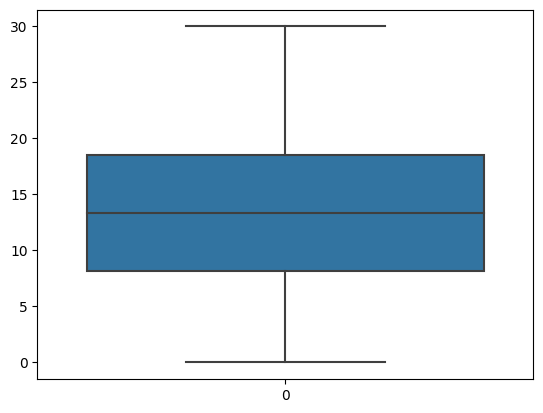

In [42]:
#using boxplot
sns.boxplot(data['dti'])

There are no outliers in dti

#### 2. loan_amnt

<Axes: >

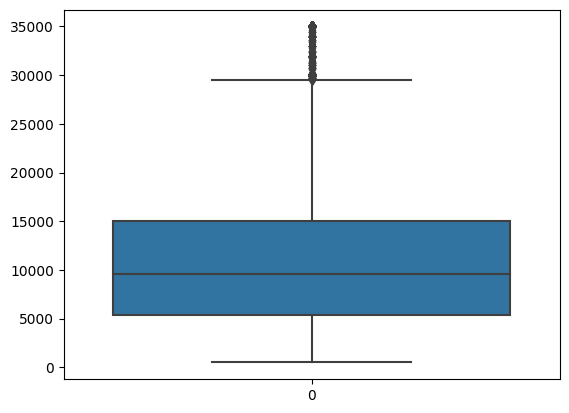

In [43]:
sns.boxplot(data['loan_amnt'])

In [44]:
#Check with clear percentile splits
data['loan_amnt'].quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    15000.0
0.900    21600.0
0.950    25000.0
0.970    28000.0
0.975    30000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

Though there are outliers, they don't seem too far away from the other values

#### 3. funded_amnt_inv

<Axes: >

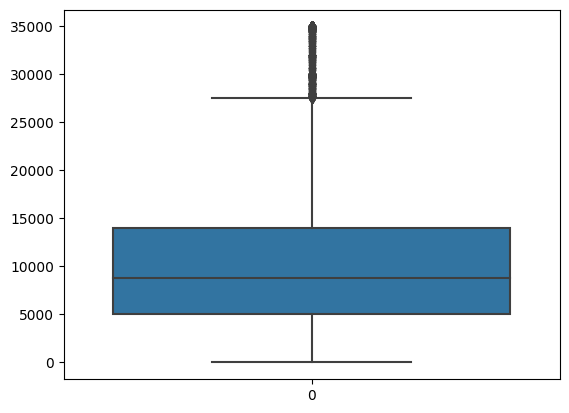

In [45]:
sns.boxplot(data['funded_amnt_inv'])

In [46]:
#Check with clear percentile splits
data['funded_amnt_inv'].quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8750.000000
0.750    14000.000000
0.900    19975.000000
0.950    24506.582238
0.970    25828.061320
0.975    27975.000000
0.980    29890.414864
0.985    30000.000000
0.990    34721.583150
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

Though there are outliers, they don't seem too far away from the other values. So, lets leave it as is

#### 4. annual_inc

<Axes: >

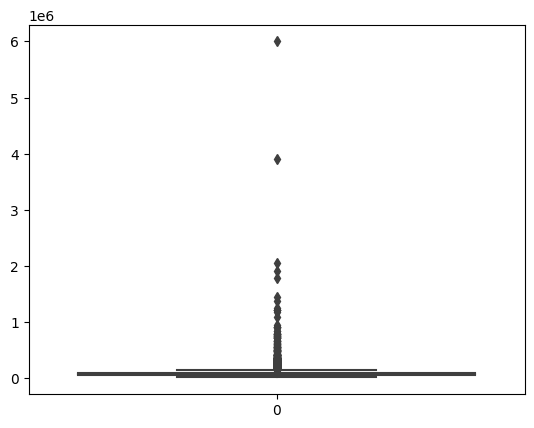

In [47]:
sns.boxplot(data['annual_inc'])

We can observe that the outliers in "annual_inc" effect the distribution

In [48]:
#check further with percentile splits
data['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

Looks like there is lot of distance between the values after 95 percentile from rest of the distribution. Hence, we remove the outliers after 95 percentile

In [49]:
print("Size of Data before removing outliers:",data.shape)

Size of Data before removing outliers: (38527, 23)


In [50]:
annual_inc_95 = data['annual_inc'].quantile(0.95)
data = data[data['annual_inc'] <= annual_inc_95]

In [51]:
print("Size of Data after removing outliers:",data.shape)

Size of Data after removing outliers: (36606, 23)


39667-37695 = 1972 rows with outliers have been removed for better analysis

<Axes: >

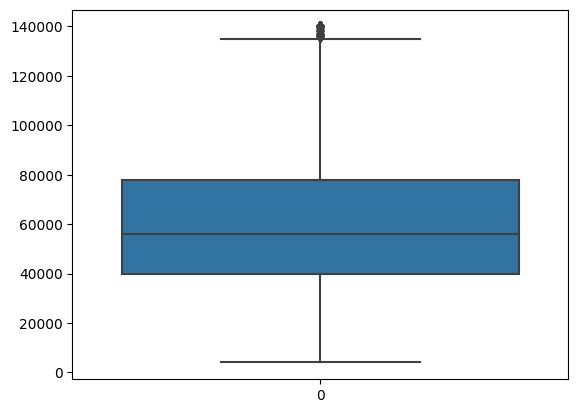

In [52]:
sns.boxplot(data['annual_inc'])

Now the "annual_inc" is not effected by outliers

### Univariate Analysis

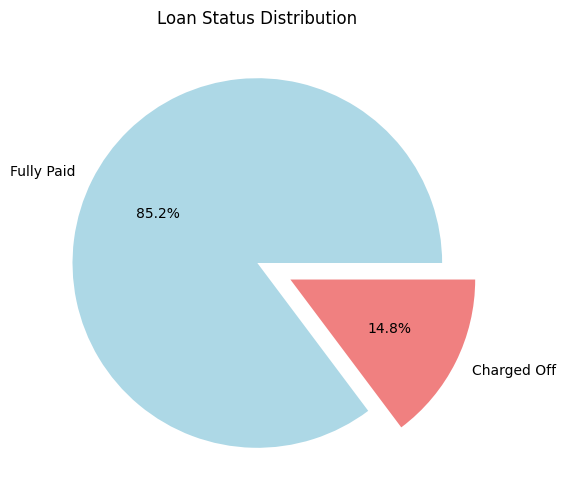

In [53]:
#Percentage of Fully paid and charged off loan among total loans
value_counts = data['loan_status'].value_counts()
plt.figure(figsize=(6, 6))
explode = (0, 0.2)
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], explode = explode)
plt.title("Loan Status Distribution")
plt.show()

##### We can observe that around 15% loans were charged off out of the total loans issued

##### Analyze home ownership

In [54]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [55]:
data['home_ownership'].value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

#### As "NONE" is repeated only three times, we'll replace it with "OTHER"

In [56]:
data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [57]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [58]:
data['home_ownership'].value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          94
Name: home_ownership, dtype: int64

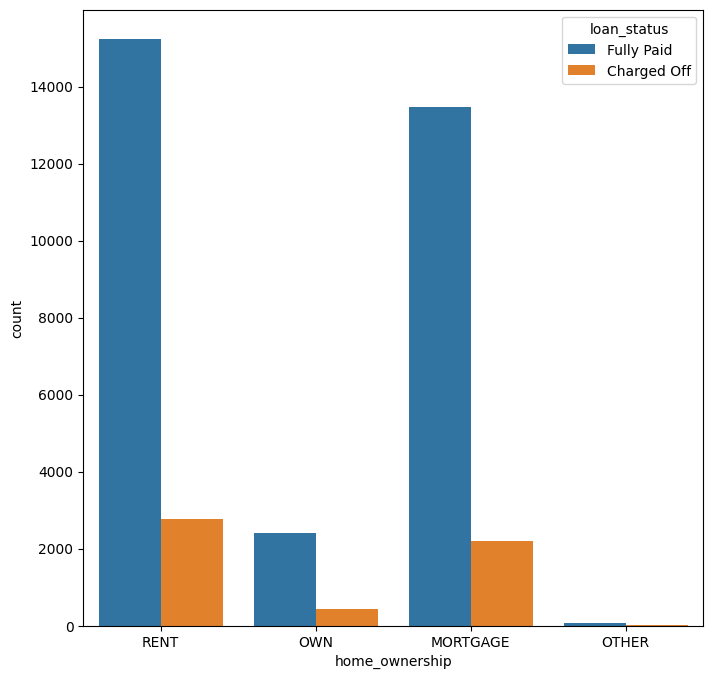

In [59]:
#countplot to visualize loan status among different hom_ownership categories
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.countplot(x="home_ownership",data=data,hue='loan_status')

#### We can observe that people from "Rent" and "Mortgage" categories are more dominant among all the customers. We also observe that defaulters are highest who stay in rented houses followed by people who mortgaged their houses

#### Charged_off status based on grades of the loan

<Axes: xlabel='grade', ylabel='count'>

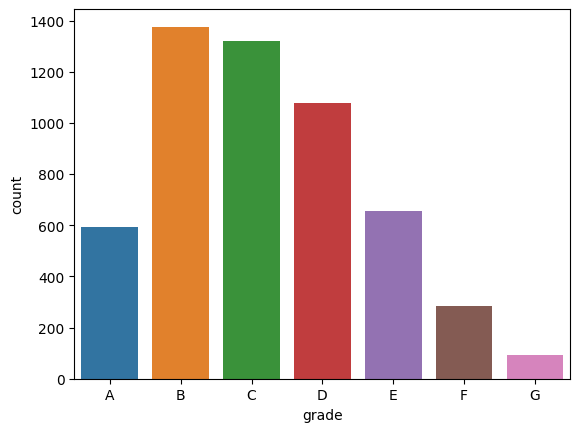

In [60]:
sns.countplot(x = 'grade', data = data[data['loan_status'] == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

#### Analyze charged_off status based on purpose of the loan

<Axes: xlabel='count', ylabel='purpose'>

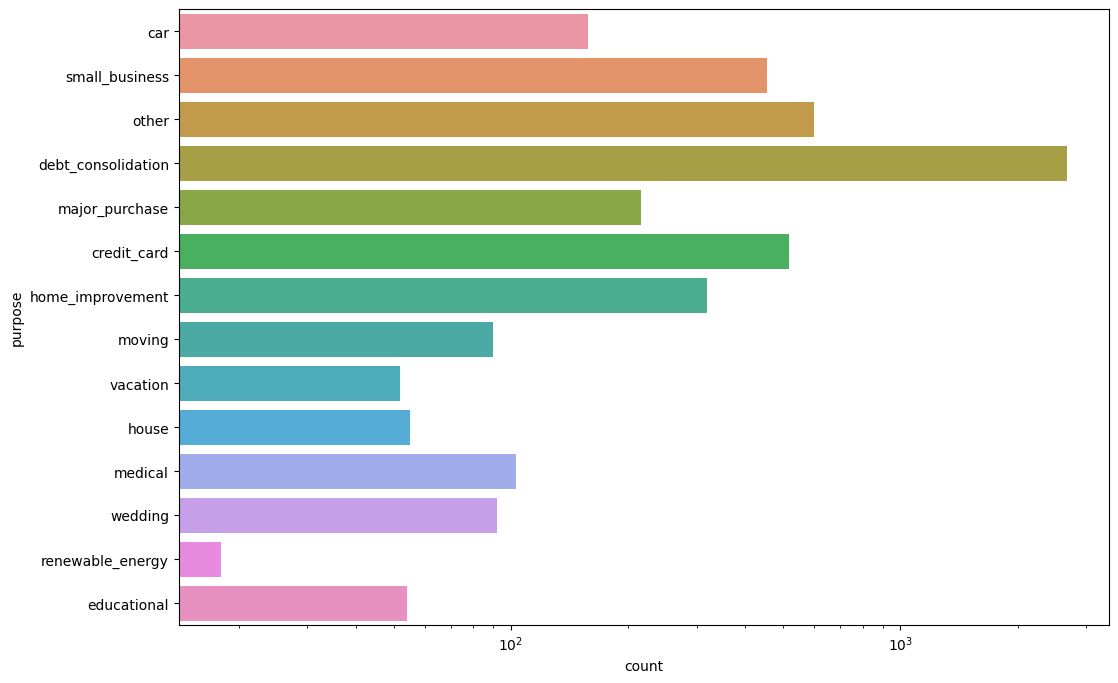

In [61]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=data[data['loan_status'] == 'Charged Off'])

We can observe that debt consolidations ,  credit card bill payment, small business are the major known categories in which customers have defaulted 

#### Analysis on Employment Length

<Axes: xlabel='emp_length', ylabel='count'>

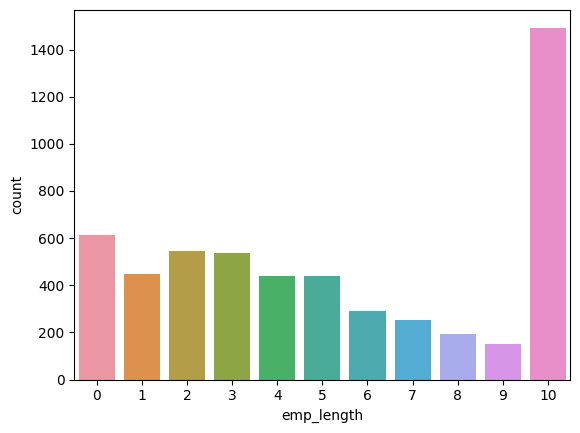

In [62]:
sns.countplot(x='emp_length', data=data[data['loan_status'] == 'Charged Off'])

From the above graph we can observe that:
1. As the years of employment is increasing, charged-off count is decreasing generally. 
2. But, the two extremes are high compared to others.
3. Customers who have less than one year experience are likely to default when compared to other people
4. Customers who have 10 or more years work experience are most likely to default the loan among all others

#### Analysis on loan tenure

<Axes: xlabel='count', ylabel='term'>

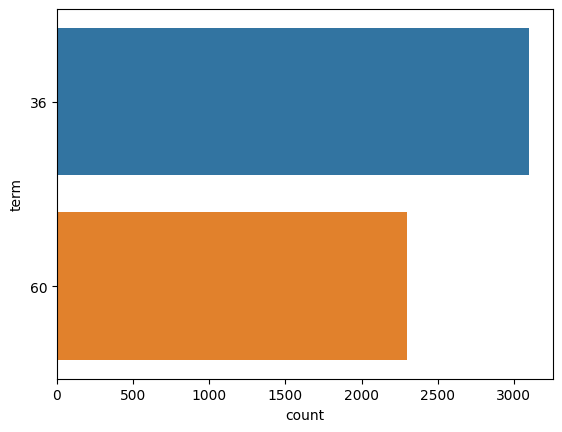

In [63]:
sns.countplot(y='term', data=data[data['loan_status']=='Charged Off'])

We can observe that loans with less tenure are likely to be charged off

#### Analysis on Verification Status

<Axes: xlabel='verification_status', ylabel='count'>

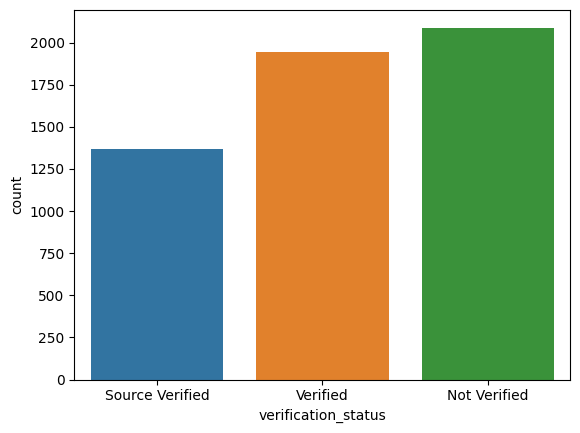

In [64]:
sns.countplot(x='verification_status', data=data[data['loan_status']=='Charged Off'])

We can observe that customers who are not verified are most likely to be charged off

#### Analysis on Number of Inquires made in last 6 months

<Axes: xlabel='inq_last_6mths', ylabel='count'>

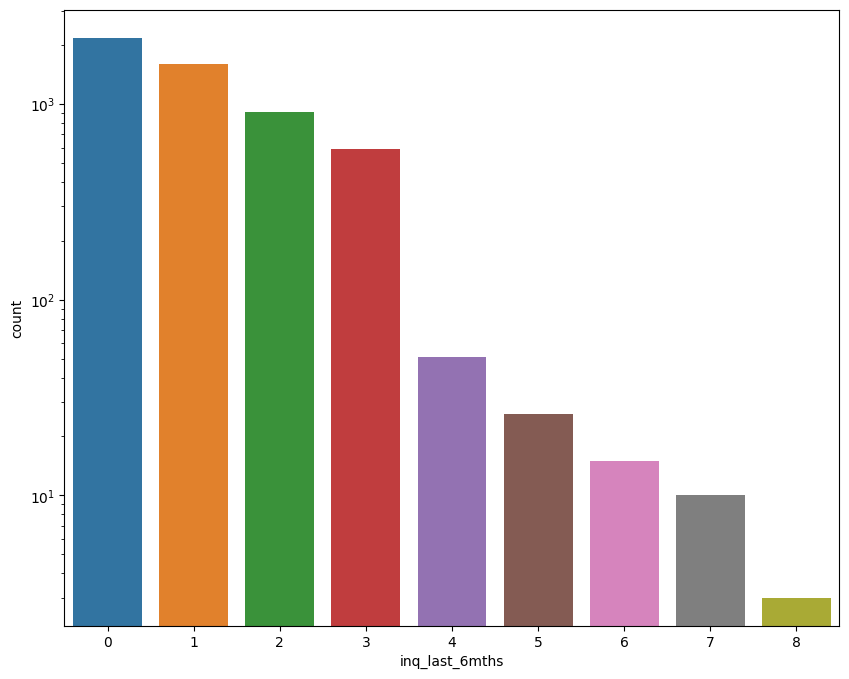

In [65]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=data[data['loan_status']=='Charged Off'])

We can observe that, customers who made less or no inquires in the last 6 months are most likely to default.

#### Analysis on Number of derogatory public records

<Axes: xlabel='pub_rec', ylabel='count'>

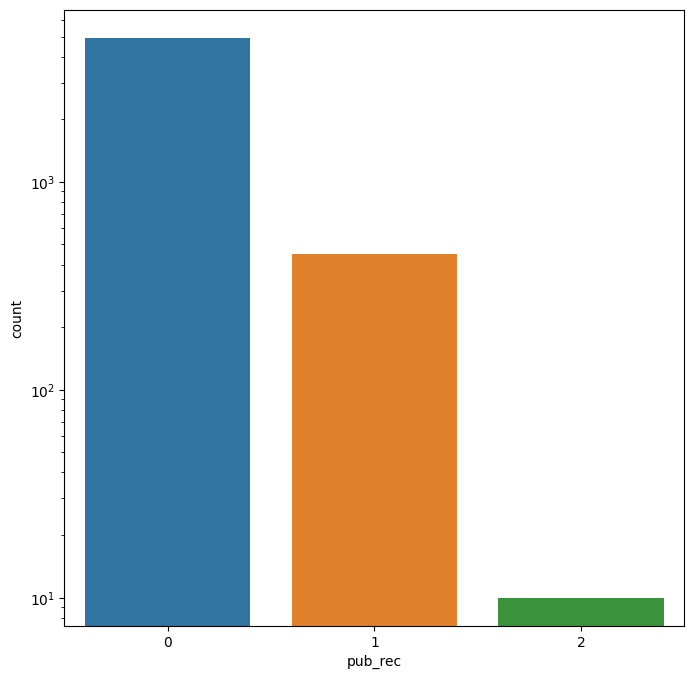

In [66]:
fig,ax = plt.subplots(figsize = (8,8))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=data[data['loan_status']=='Charged Off'])

We can observe that the customers with less number of derogatory public records are most likely to default the loan when compared to others

#### Effect of month and year on defaults

Text(0.5, 0, 'Issue Year')

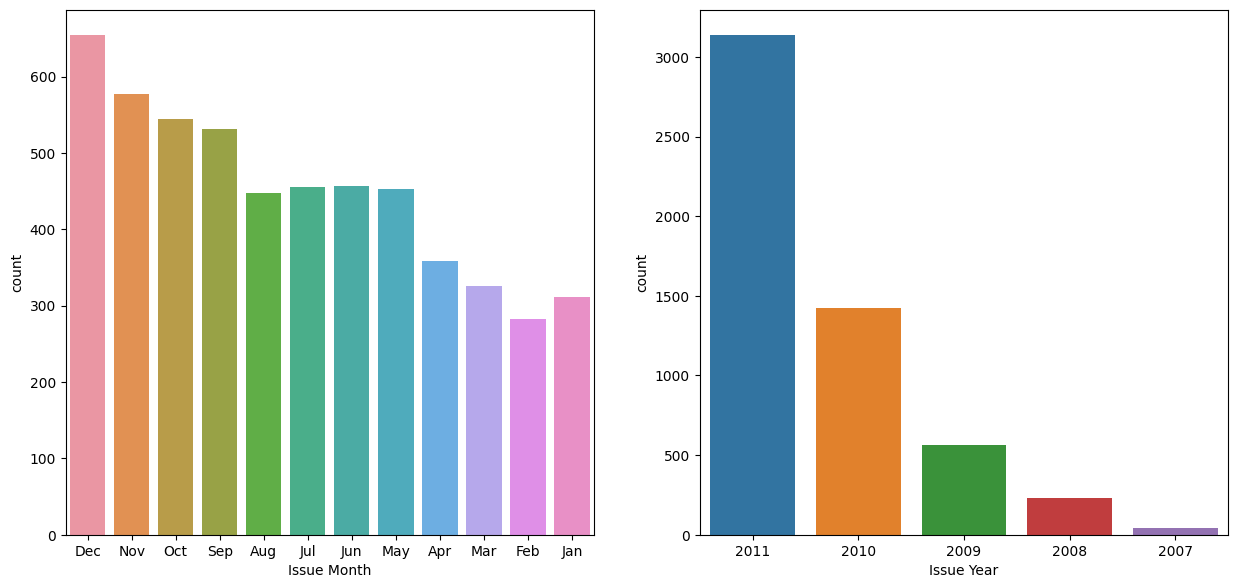

In [67]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_m',data=data[data['loan_status']=='Charged Off'])
plt.xlabel("Issue Month")
plt.subplot(222)
sns.countplot(x='issue_y', data=data[data['loan_status']=='Charged Off'])
plt.xlabel("Issue Year")

Observations:
    1. Most loans are charged off in the year end - Oct, Nov, Dec
    2. As the year is increasing, number of defaulters are increasing too

In [68]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,issue_m,issue_y
0,5000,4975.0,36,10.65,162.87,B,B2,10,RENT,24000.0,...,credit_card,27.65,Jan-85,1,3,0,83.7,9,Dec,2011
1,2500,2500.0,60,15.27,59.83,C,C4,0,RENT,30000.0,...,car,1.00,Apr-99,5,3,0,9.4,4,Dec,2011
2,2400,2400.0,36,15.96,84.33,C,C5,10,RENT,12252.0,...,small_business,8.72,Nov-01,2,2,0,98.5,10,Dec,2011
3,10000,10000.0,36,13.49,339.31,C,C1,10,RENT,49200.0,...,other,20.00,Feb-96,1,10,0,21.0,37,Dec,2011
5,5000,5000.0,36,7.90,156.46,A,A4,3,RENT,36000.0,...,wedding,11.20,Nov-04,3,9,0,28.3,12,Dec,2011


#### To make it our visuzlization better, let's convert some of the qumantitive variables to categorical by creating bins

In [69]:
data['int_rate_groups'] = pd.cut(data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
data['open_acc_groups'] = pd.cut(data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
data['revol_util_groups'] = pd.cut(data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
data['total_acc_groups'] = pd.cut(data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
data['annual_inc_groups'] = pd.cut(data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
data['installment_groups'] = pd.cut(data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
data['funded_amnt_inv_group'] = pd.cut(data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
data['loan_amnt_groups'] = pd.cut(data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data['dti_groups'] = pd.cut(data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])


#### Let's analyze each columns based on the new groups created

1. Interest Rate Group

Text(0.5, 0, 'Interest Rate')

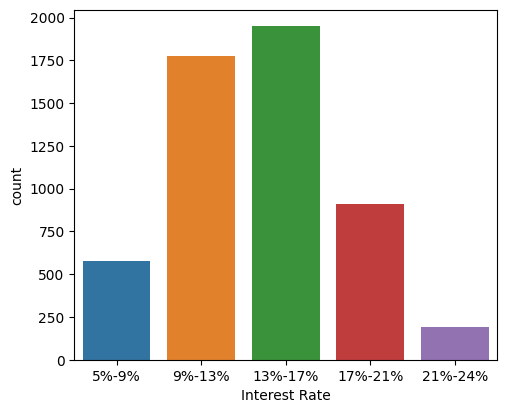

In [70]:
fig, ax = plt.subplots(figsize = (12,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=data[data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

We can observe that defaulters are more for the loans which have 13-17% interest rate

#### 2. Number of Open credit line accounts

<Axes: xlabel='open_acc_groups', ylabel='count'>

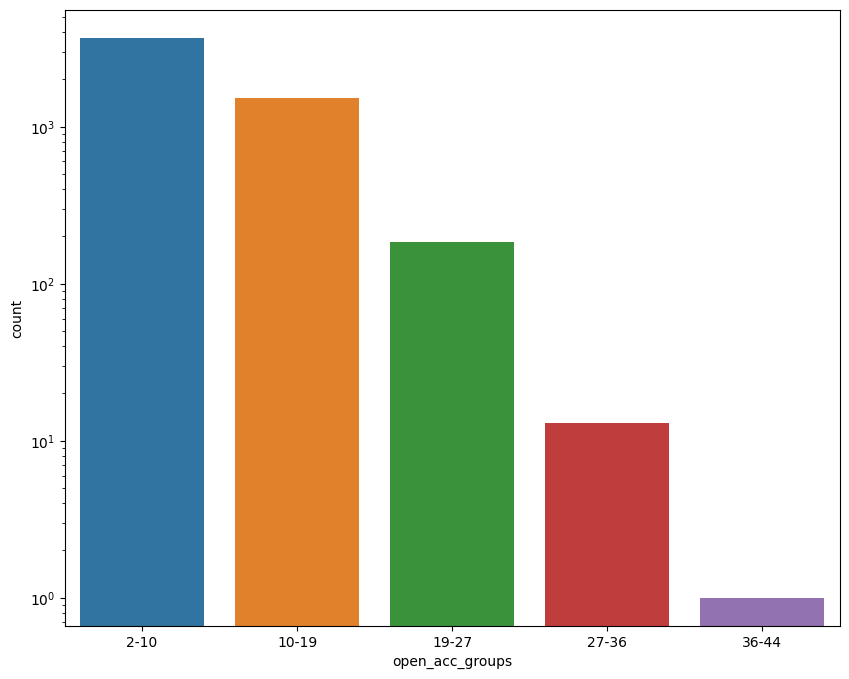

In [71]:
fig, ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=data[data['loan_status'] == 'Charged Off'])

We can observe that, if a customer has less number of open credit lines, he is most likely to default

#### 3. Effect of Revolving line utilization rate on charged off accounts

<Axes: xlabel='revol_util_groups', ylabel='count'>

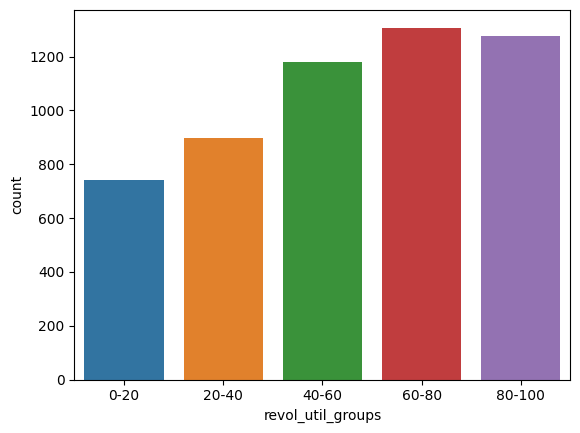

In [72]:
sns.countplot(x='revol_util_groups', data=data[data.loan_status == 'Charged Off'])

We can observe that, customers with 60-80 revolving line utilization rate are most likely to default the loan

#### 4.Total Number of credit lines

<Axes: xlabel='total_acc_groups', ylabel='count'>

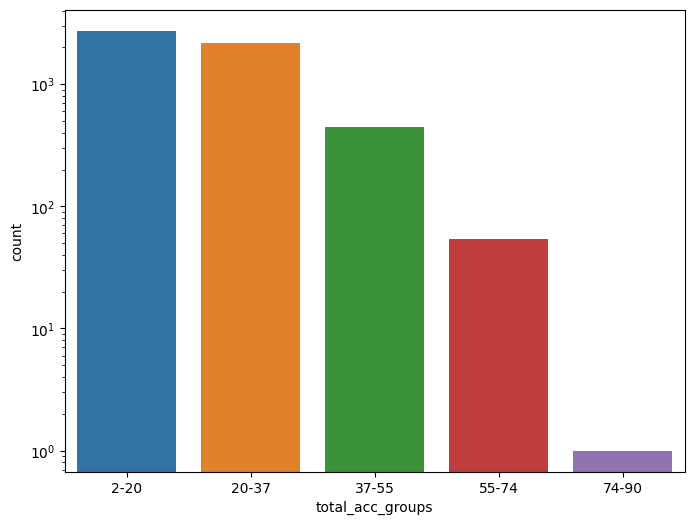

In [73]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=data[data.loan_status == 'Charged Off'])

We can observe that, if a customer is having total number of credit lines from 2-20, he's most likely to default the loan

#### 5. Annual Imcome groups

<Axes: xlabel='annual_inc_groups', ylabel='count'>

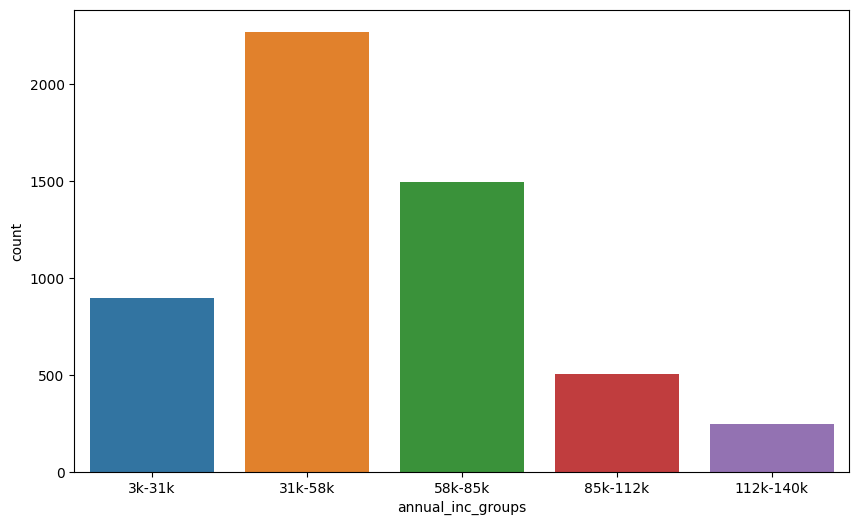

In [74]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=data[data.loan_status == 'Charged Off'])

We can observe that, a customer with annual income in the range 31k - 58k are most likely to default the loan

#### 6.Total amount committed by investors to the loan - groups 

<Axes: xlabel='funded_amnt_inv_group', ylabel='count'>

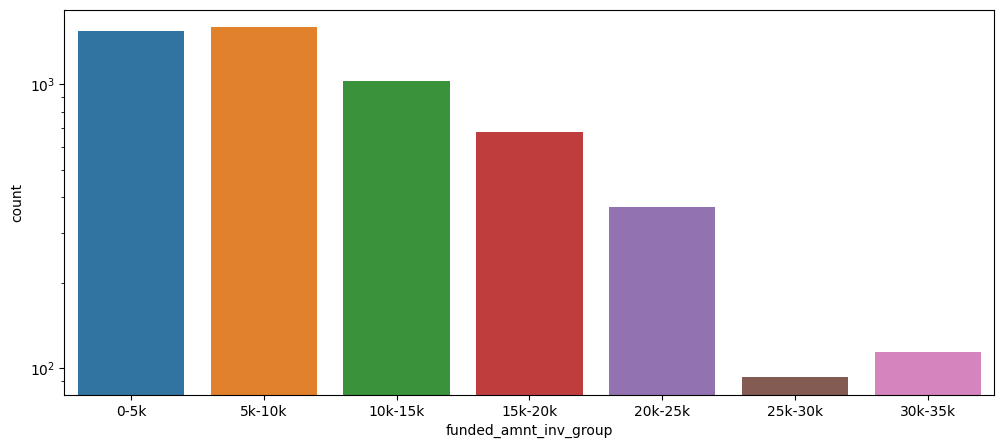

In [75]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=data[data['loan_status']=='Charged Off'])

We can observe that, if the total amount commited by the inverstors is in the range 5-10k, the customer is most likely to default the loan

#### 7. The amount of loan applied by the customer

<Axes: xlabel='loan_amnt_groups', ylabel='count'>

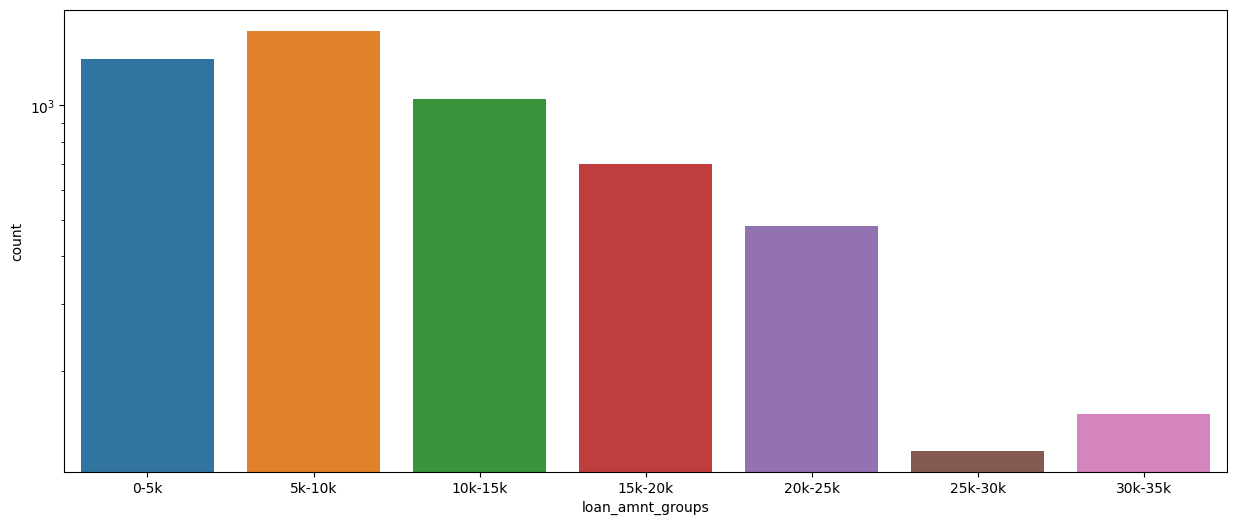

In [76]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=data[data['loan_status']=='Charged Off'])

We can observe that, amount of loan applied and the amount commited by the investors are mostly similar. Also, if the loan amount applied by the customer is in the range of 5k-10k, the loan is most likely to be defaulted

#### 8. dti ratio groups

<Axes: xlabel='dti_groups', ylabel='count'>

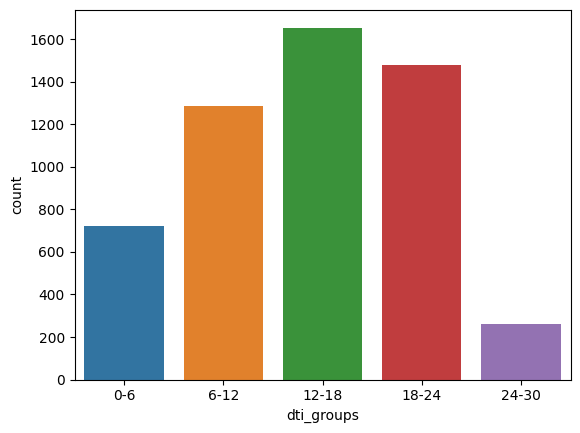

In [77]:
sns.countplot(x='dti_groups', data=data[data['loan_status']=='Charged Off'])

We can observe that if the dti ratio of a customer is in the range 12-18, the customer is most likelly to default the loan

#### 9. Installment paid per month groups

<Axes: xlabel='installment_groups', ylabel='count'>

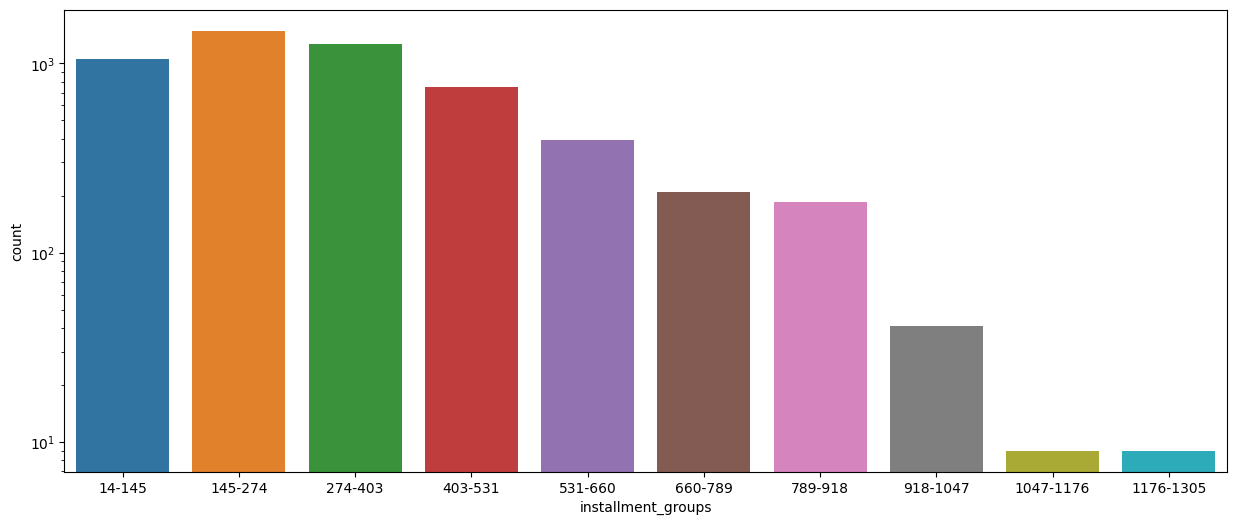

In [78]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=data[data['loan_status']=='Charged Off'])

We can observe that, if the monthly installment is in the range of 145-274, the customer is most likely to default the loan

### Observations:

#### Through the analysis of "charged off" loan status from the above plots, The probability of an applicant to default a loan is high when:

- The applicant has the house ownership category as "RENT."
- The loan application category is of "B" Grade.
- The applicant uses the loan to clear other debts (debt_consolidation).
- The applicant has ten or more years of work-related experience.
- The loan tenure is 36 months.
- The applicant verification status is "not verified."
- The applicant made no inquiries in the last six months.
- The applicant has no derogatory public records.
- The interest rate on the loan application is in the range of 13%-17%.
- The number of open credit line accounts is in the range of 2-10.
- The applicant has an annual income in the range of 31k - 58k.
- The amount funded by the investor is in the range of 5000-10000.
- The loan amount is in the range of 5k - 10k.
- The dti-ratio is in the range of 12-18.
- The installments are in the range of 145-274.

Another interesting observation is that there is probability of loan to be defaulted in late months of the year (Dec, Nov, Oct  in the respective order)

#### Correlation analysis

### Bivariate Analysis

In [79]:
#Subset the numerical values to perform correlation Analysis between two variables
numerical_data = data.select_dtypes(include='number')

In [80]:
numerical_data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

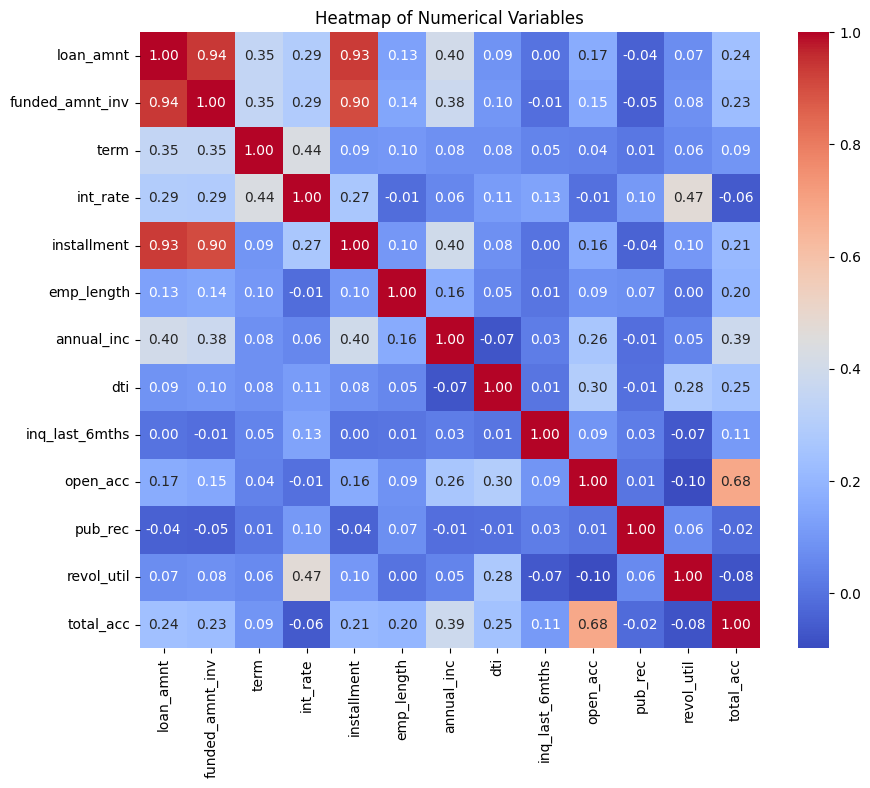

In [81]:
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Variables')
plt.show()

Observations:

From the above Heatmap on numerical variables in the data, We can understand that:
- loan_amnt and funded_amnt_inv are highly correlated (0.94)
- loan_amnt and installments are highly correlated (0.93)
- funded_amnt_inv of the installments are highly correlated (0.90)

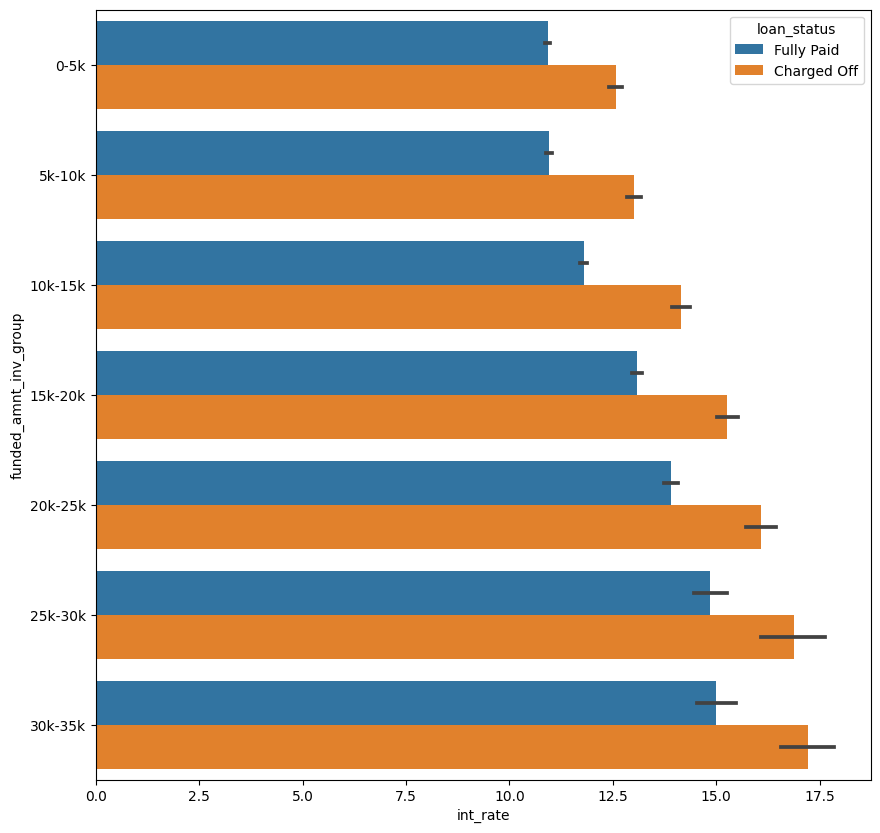

In [82]:
#Effect of rate of interest and funded amount on loan status
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='int_rate', y='funded_amnt_inv_group', hue ='loan_status')
plt.show()

We can observe that, as the funded amount is increasing, the rate of interest is also increasing. Also, as funded_amnt_inv and int_rate is increasing, there is increase in number of defaults too.

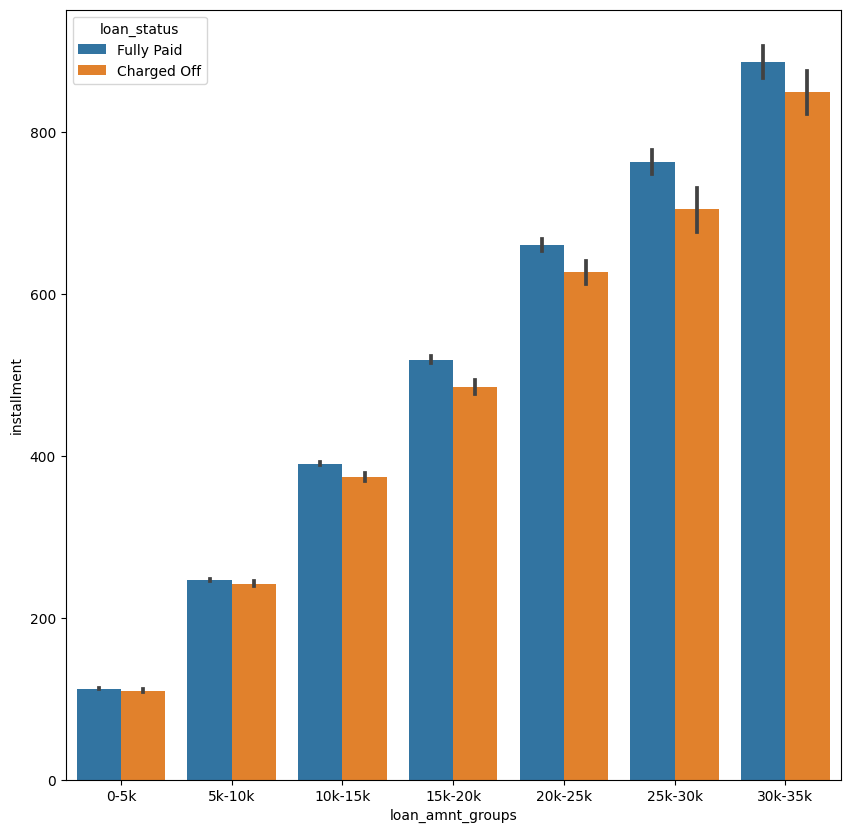

In [83]:
#loan amount vs installments
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt_groups', y='installment', hue ='loan_status')
plt.show()

We can observe that, as the loan amount is increasing, the installment amount is increasing and Also, as the loan amount is increasing, number of defaults in each loan amount range are decreasing when compared to the fully paid group

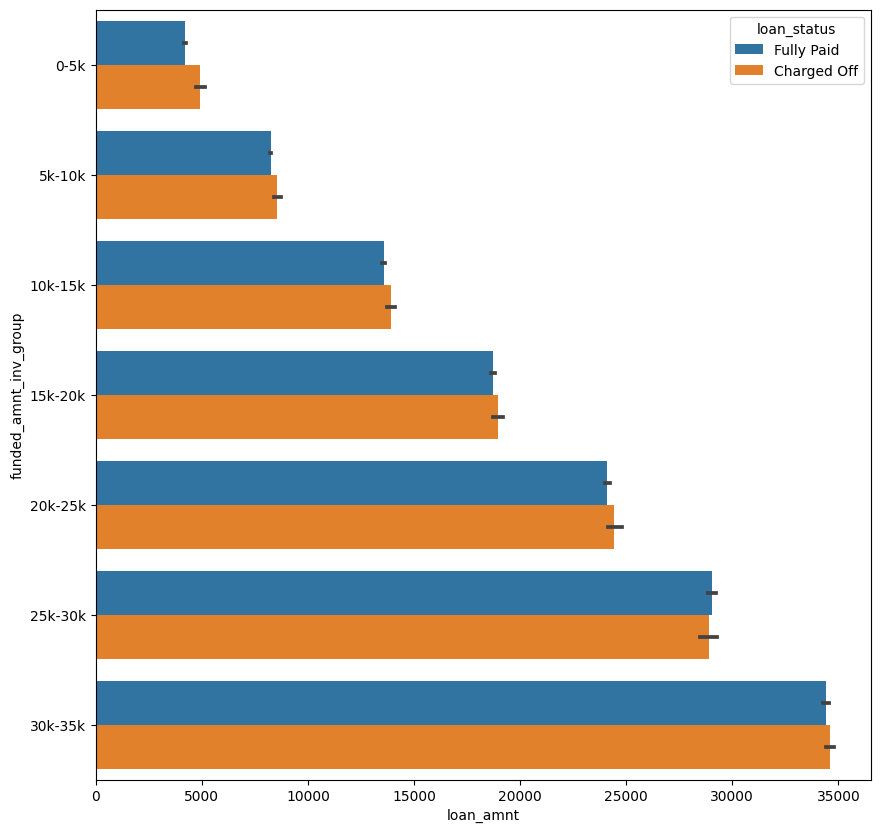

In [84]:
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt', y='funded_amnt_inv_group', hue ='loan_status')
plt.show()

We can observe that, as the loan mount is increasing, funded amount is also increasing. Also, the number of defaults are increasing too with an increase in loan_amnt and funded_amnt_inv

#### Let's look at other combinations

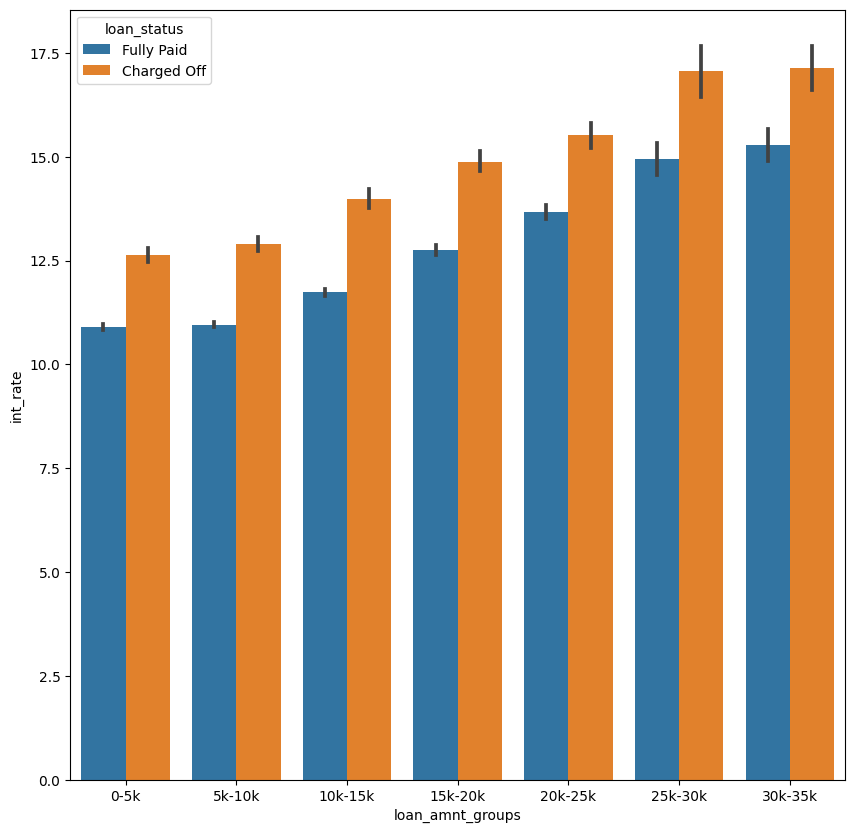

In [85]:
#loan amount vs rate of interest
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt_groups', y='int_rate', hue ='loan_status')
plt.show()

We can observe that, as loan amount is increasing, interest on the loan is also increasing

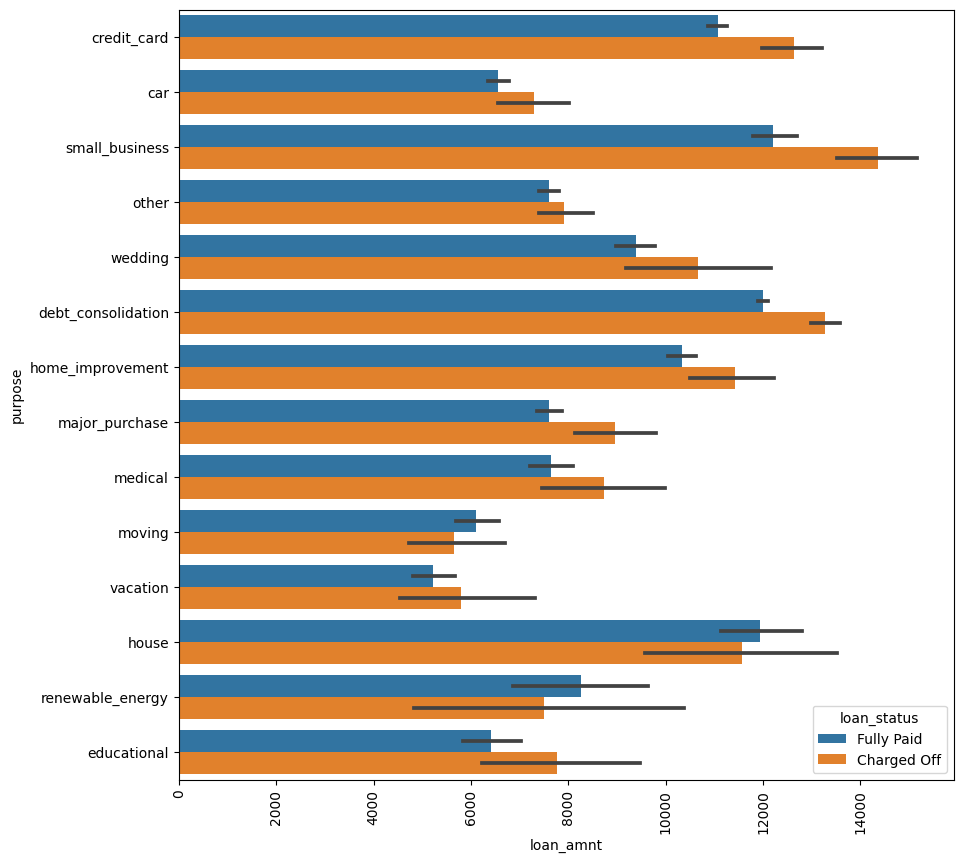

In [86]:
#loan amount vs purpose of loan
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='loan_amnt', y='purpose', hue ='loan_status')
plt.xticks(rotation=90)
plt.show()

We can observe that higher loan amounts are approved for small business, debt consolidation, credit card bill payment and house purchase. Also, we can observe that high loan amounts have been charged off by customers who took loan for small business

<Axes: xlabel='issue_y', ylabel='loan_amnt'>

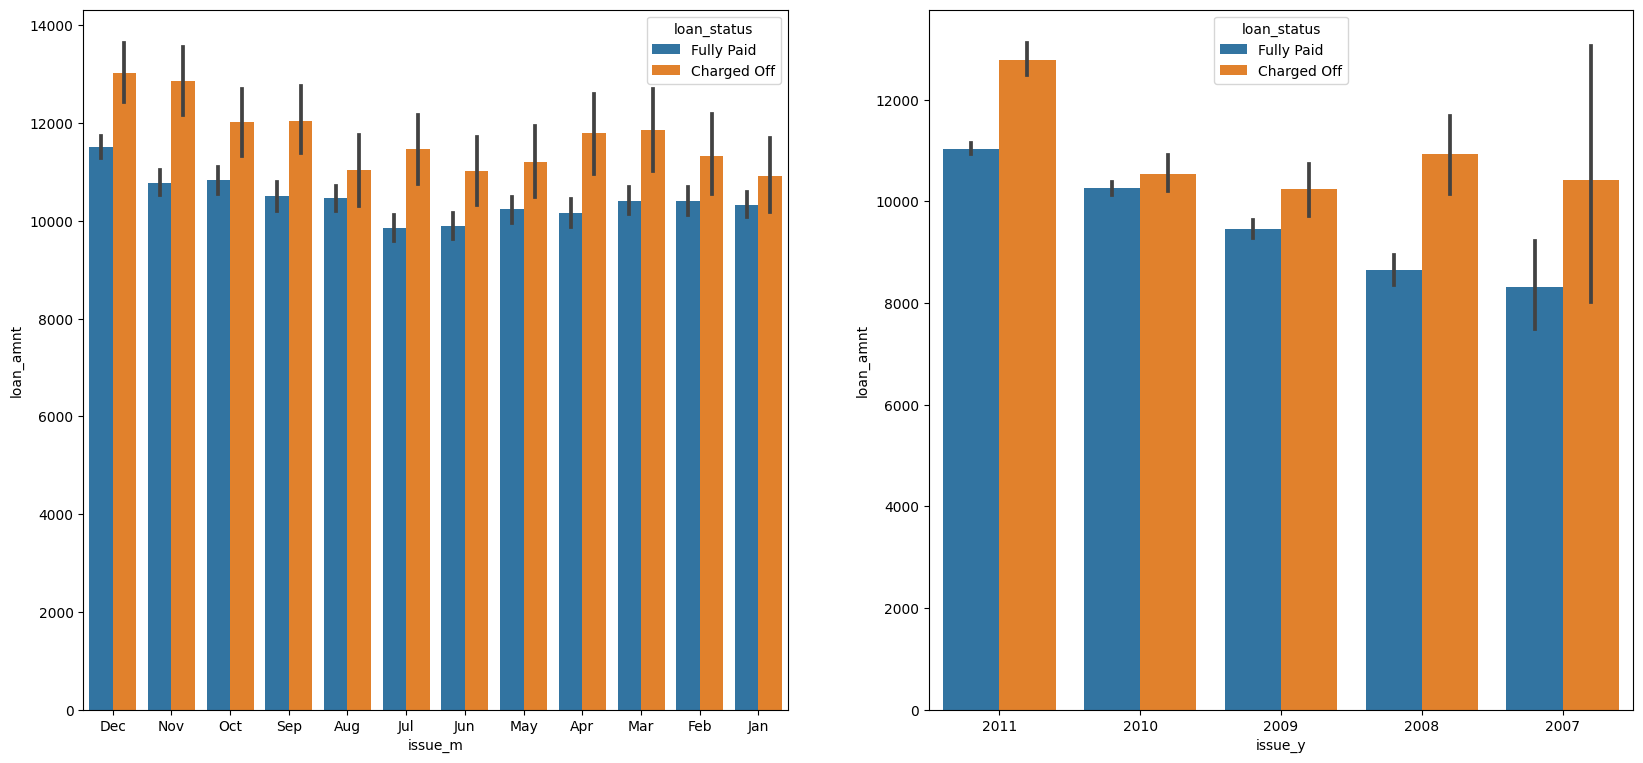

In [87]:
#loan amount across months and years
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =data,y='loan_amnt', x='issue_m', hue ='loan_status')
plt.subplot(222)
sns.barplot(data =data,y='loan_amnt', x='issue_y', hue ='loan_status')

From the above subplots we can observe that, higher loan amounts are being charged off in the year end. Also, 2011 has more defaulters with high loan amount when compared to other years

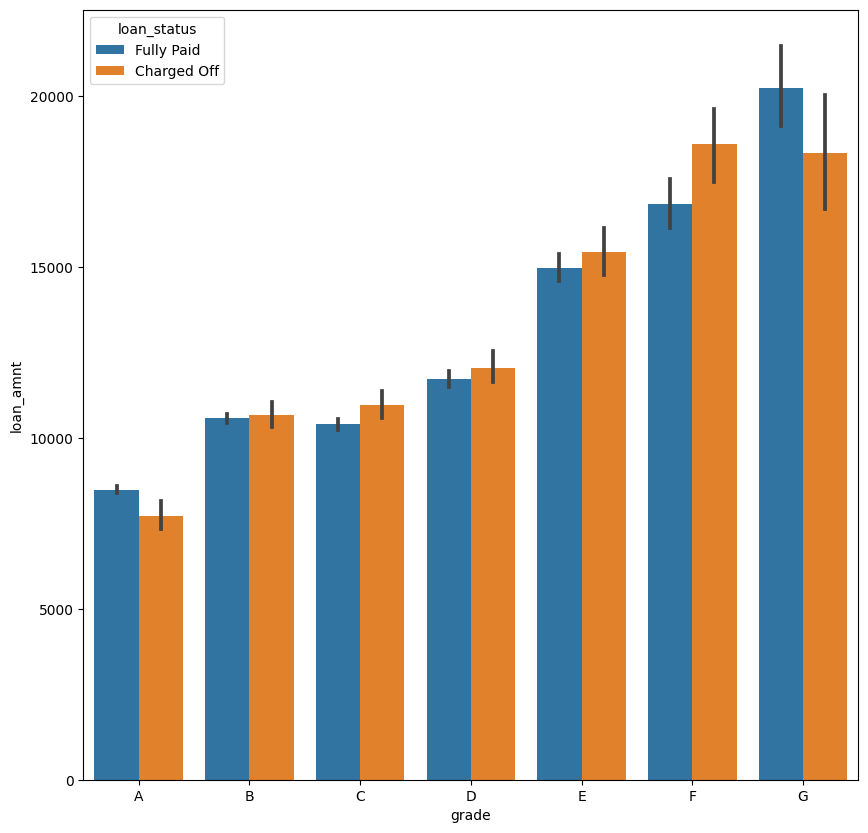

In [88]:
#Effect of grade on amount of loan approved
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='grade', y='loan_amnt', hue ='loan_status', order=['A','B','C','D','E','F','G'])
plt.show()

We can observe that, as the loan grade is moving from A to G, the loan amount approved is also getting increased. 

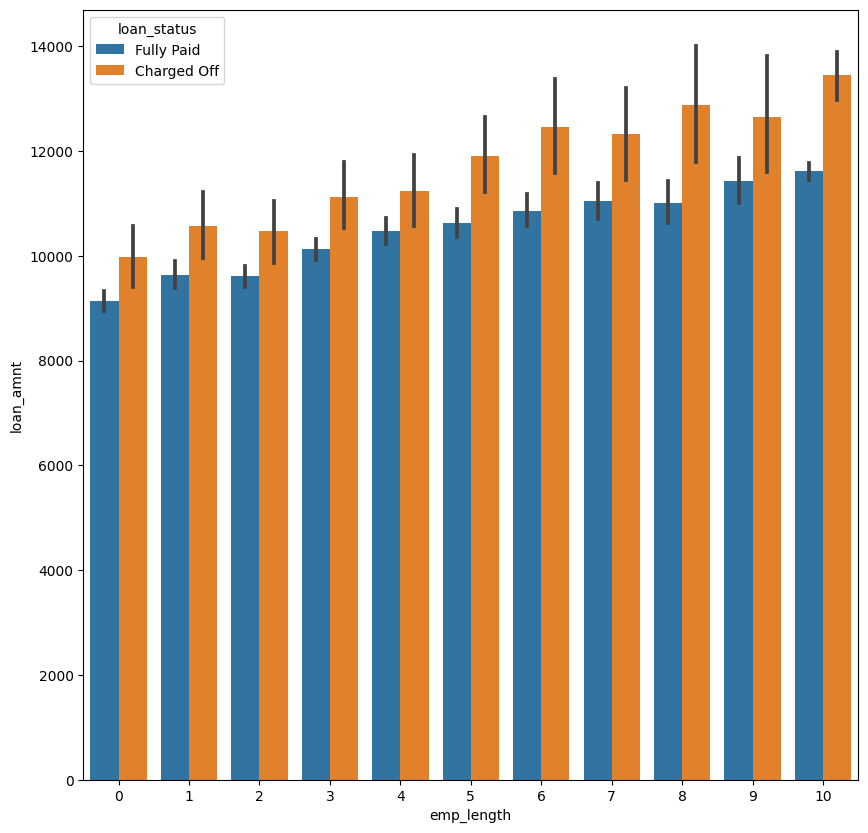

In [89]:
#Effect of employment length on amount of loan approved
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='emp_length', y='loan_amnt', hue ='loan_status')
plt.show()

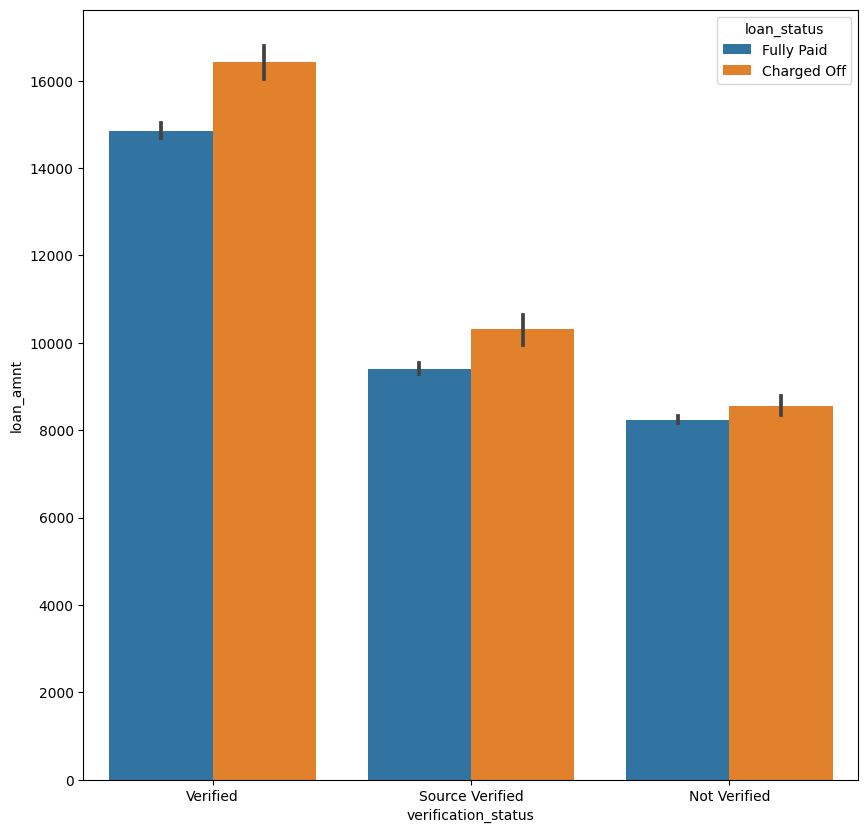

In [90]:
#Effect of employment length on amount of loan approved
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='verification_status', y='loan_amnt', hue ='loan_status')
plt.show()

<Axes: xlabel='emp_length', ylabel='loan_amnt'>

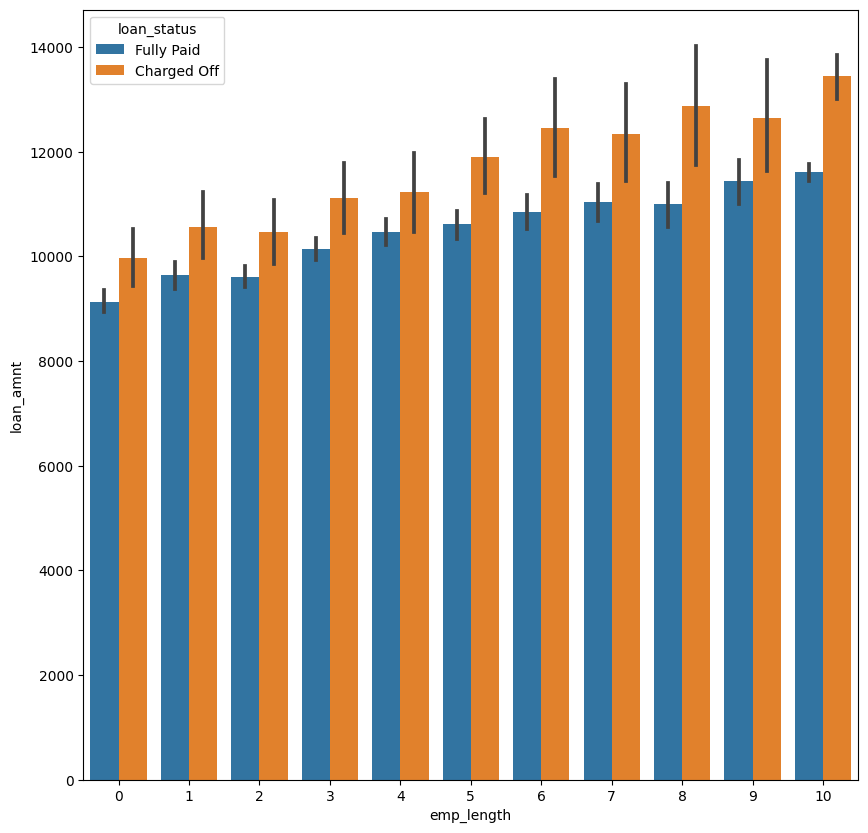

In [91]:
#effect of loan amount approval on employee work history 
plt.figure(figsize=(10,10))
sns.barplot(data =data,y='loan_amnt', x='emp_length', hue ='loan_status')

We can observe that the loans are approved in higher amount with increase in employees working history.

<Axes: xlabel='dti_groups', ylabel='int_rate'>

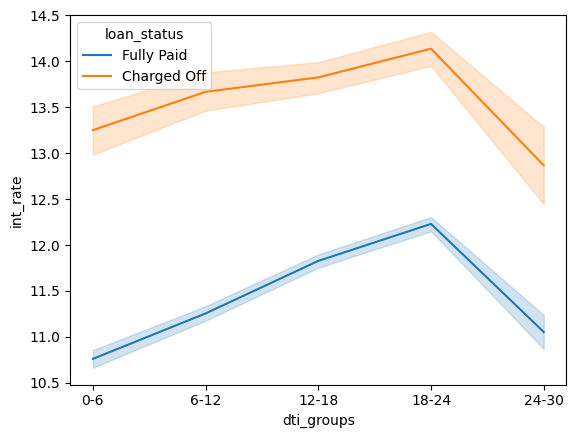

In [92]:
#dti vs int_rate across charged off loans
sns.lineplot(data =data,y ='int_rate', x ='dti_groups', hue ='loan_status')

<Axes: xlabel='loan_amnt_groups', ylabel='int_rate'>

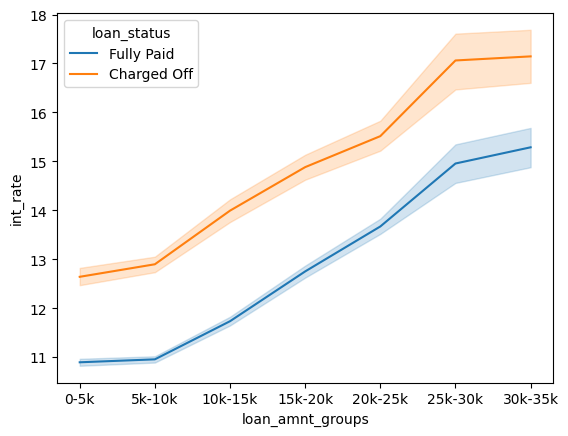

In [93]:
#effect of interest rates on loan amount
sns.lineplot(data =data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status')

This is an interesting observation- The rate of interest for charged off loans is higher than fully paid loans in every loan amount groups in the above plot

<Axes: xlabel='term', ylabel='loan_amnt'>

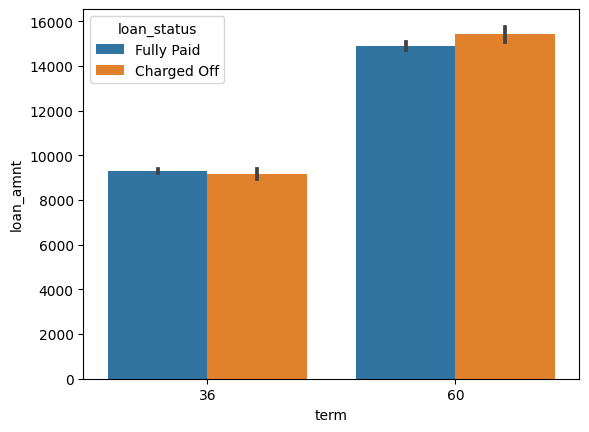

In [94]:
#Term vs loan amount
sns.barplot(x = 'term', y = 'loan_amnt', data = data,hue = 'loan_status')

We can observe that applicants, who have defaulted loans don't have much difference in loan amounts when compared to other people in the same tenure. We can also observe that, customers who have applied for higher loan amount have opted for higher tenure

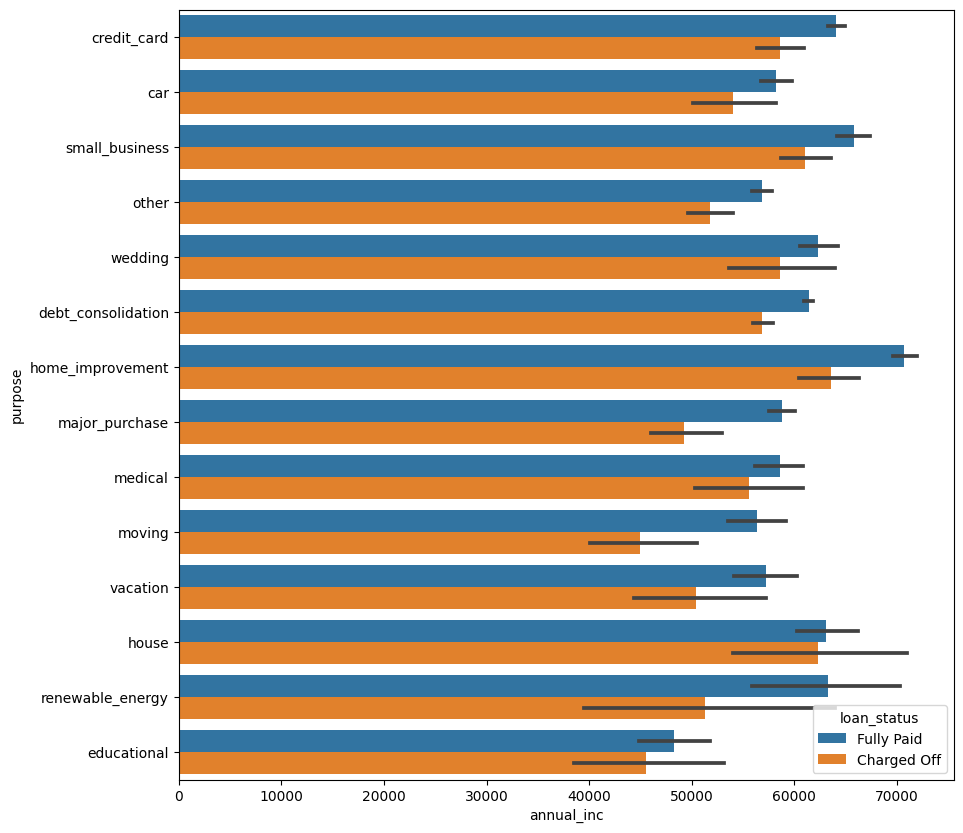

In [95]:
#effect of annual income and purpose on loan default
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='annual_inc', y='purpose', hue ='loan_status')
plt.show()

We can observe that most of the customers with high annual income, apply loans for home renovations/ improvements and credit card bill payments

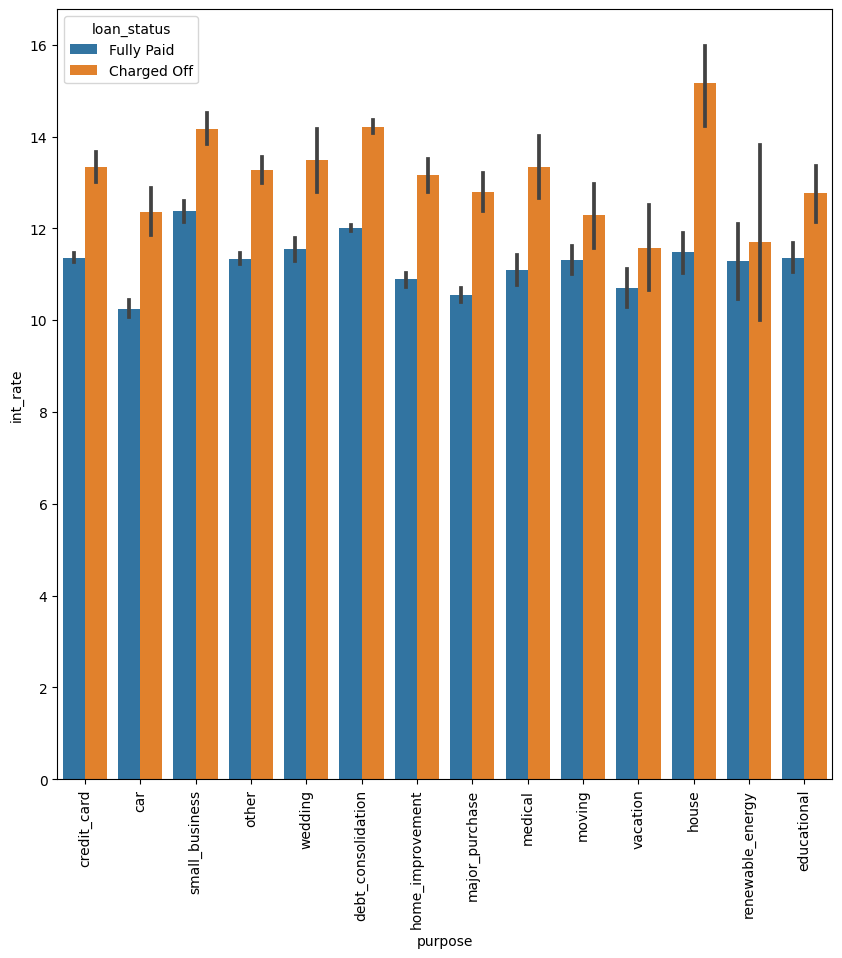

In [96]:
#effect of int_rate and purpose on loan default
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='purpose', y='int_rate', hue ='loan_status')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='annual_inc_groups', ylabel='loan_amnt'>

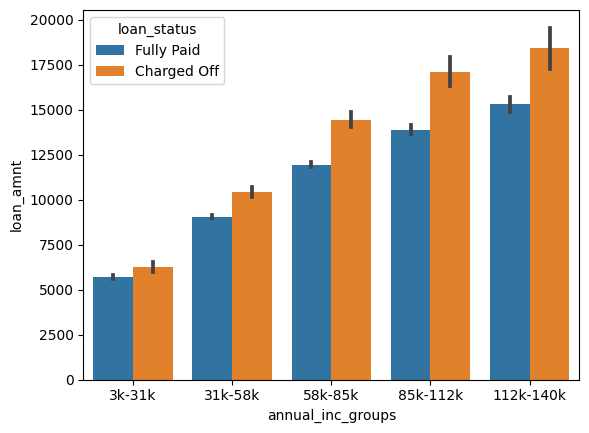

In [97]:
#loan amount vs annual income groups
sns.barplot(x = "annual_inc_groups", y = "loan_amnt", hue = 'loan_status', data = data)

We can observe that as the annual income is increasing, loan_amnt approved is also increasing. Also, the number of defaults are increasing too.

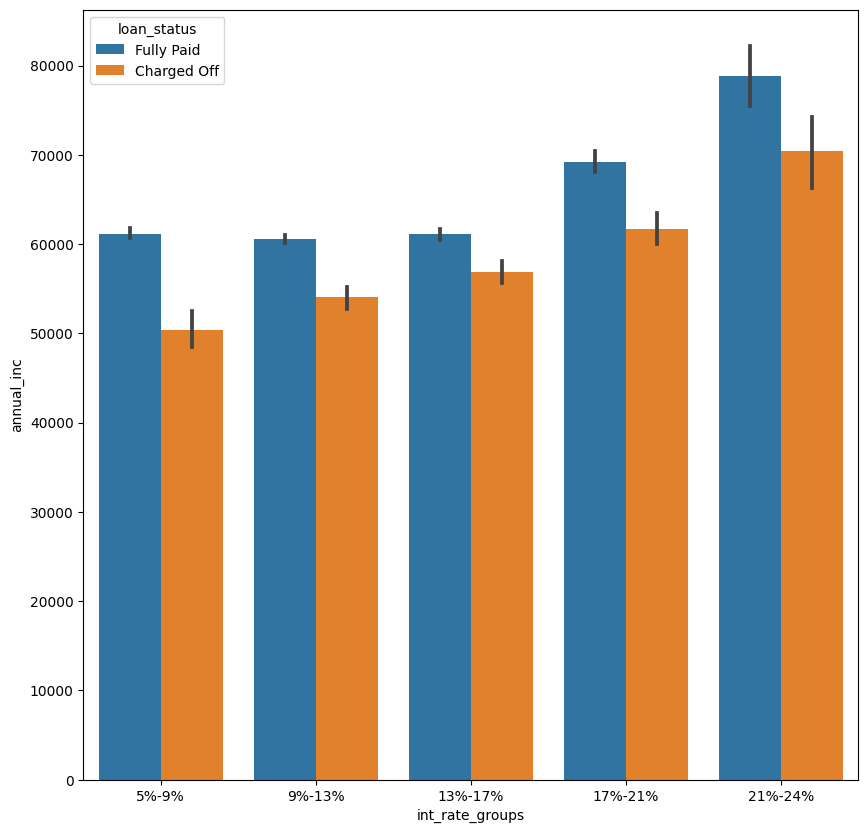

In [98]:
#interest rate vs annual income
plt.figure(figsize=(10,10))
sns.barplot(data =data,x='int_rate_groups', y='annual_inc', hue ='loan_status')
plt.show()

We can observe that, as annual income is increasing, rate of interest on the loan is also increasing

### Observations:

#### Through the analysis of "charged off" loan status from the above plots, The probability of an applicant to default a loan is high when:

- Applicants who have taken a loan amount in the range of 30k-35k are charged an interest rate of 16-18%.
- Applicants who have taken a loan for a small business and the loan amount is greater than 14k.
- The applicant's loan category is grade F, and the loan amount is 17k-20k.
- The applicant's employment length is ten or more years, and the loan amount is 12k-14k.
- The applicant's loan category is grade G, with an interest rate above 20%.
- The loan tenure is 60 months, and the loan amount is above 15k.
- The Applicant is taking the loan for 'home improvement' and has an income of 60k -70k.
- The Applicant's annual income is in the range of 112k-140k, and the loan amount is 18k.
- The Application has an interest rate of 21-24% and has an income of 70k-80k.